In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
C_m = 200.0  # 膜电容
g_L = 10.0   # 泄漏导通率
E_L = -70.0  # 泄漏反转电位
V_T = -50.0  # 阈值
Delta_T = 2.0  # 指数上升特征参数

V_reset = -65.0  # 复位电位
b = 60.0  # 每次放电后适应变量增加的值
a = 4.0   # 适应强度
tau_w = 144.0  # 自适应时间常数

T = 500.0
dt = 0.1
time = np.arange(0, T + dt, dt)

n_neurons1 = 6
n_neurons2 = 1
# 每层神经元数量

V1 = np.ones((n_neurons1, len(time))) * E_L
w1 = np.zeros((n_neurons1, len(time)))
V2 = np.ones((n_neurons2, len(time))) * E_L
w2 = np.zeros((n_neurons2, len(time)))
I_ext1 = np.zeros((n_neurons1, len(time)))
I_ext2 = np.zeros((n_neurons2, len(time)))
I_ext1[:, (time >= 100) & (time <= 300)] = 300
# 神经元的膜电位 适应变量和输入电流

g_syn = 4.0  # 突触导通率
E_syn = 0.0  # 突触反转电位
tau_syn = 5.0  # 突触电流时间常数

synaptic_currents = np.zeros((n_neurons1, len(time)))
# 每个突触的瞬时电流

for t in range(1, len(time)):

    for i in range(n_neurons1):
        dV1 = (g_L * (E_L - V1[i, t-1]) + g_L * Delta_T * np.exp((V1[i, t-1] - V_T) / Delta_T)
               - w1[i, t-1] + I_ext1[i, t-1]) * (dt / C_m)
        V1[i, t] = V1[i, t-1] + dV1
        dw1 = (a * (V1[i, t-1] - E_L) - w1[i, t-1]) * (dt / tau_w)
        w1[i, t] = w1[i, t-1] + dw1
        # 第一层神经元

        if V1[i, t] >= -40.0:
            V1[i, t-1] = 20.0
            V1[i, t] = V_reset
            w1[i, t] += b

            synaptic_currents[i, t] += g_syn * (E_syn - V2[0, t-1])
            # 计算并累加突触电流

        synaptic_currents[i, t] += synaptic_currents[i, t-1] * np.exp(-dt / tau_syn)
        # 突触电流指数衰减

    total_synaptic_current = np.sum(synaptic_currents[:, t])
    I_ext2[0, t] = total_synaptic_current
    # 第二层神经元总突触电流

    if I_ext2[0, t] > 10:
        print(f'{I_ext2[0, t]:.2f}')

    dV2 = (g_L * (E_L - V2[0, t-1]) + g_L * Delta_T * np.exp((V2[0, t-1] - V_T) / Delta_T)
           - w2[0, t-1] + I_ext2[0, t-1]) * (dt / C_m)
    V2[0, t] = V2[0, t-1] + dV2
    dw2 = (a * (V2[0, t-1] - E_L) - w2[0, t-1]) * (dt / tau_w)
    w2[0, t] = w2[0, t-1] + dw2
    # 第二层神经元

    if V2[0, t] >= -40.0:
        V2[0, t-1] = 20.0
        V2[0, t] = V_reset
        w2[0, t] += b

1680.00
1646.73
1614.12
1582.16
1550.83
1520.13
1490.02
1460.52
1431.60
1403.25
1375.47
1348.23
1321.53
1295.37
1269.72
1244.57
1219.93
1195.77
1172.09
1148.89
1126.14
1103.84
1081.98
1060.56
1039.55
1018.97
998.79
979.02
959.63
940.63
922.00
903.75
885.85
868.31
851.12
834.26
817.74
801.55
785.68
770.12
754.87
739.92
725.27
710.91
696.83
683.04
669.51
656.25
643.26
630.52
618.04
605.80
593.80
582.05
570.52
559.22
548.15
537.30
526.66
516.23
506.01
495.99
486.16
476.54
467.10
457.85
448.79
439.90
431.19
422.65
414.28
406.08
398.04
390.16
382.43
374.86
367.44
360.16
353.03
346.04
339.19
332.47
325.89
319.43
313.11
306.91
300.83
294.87
289.04
283.31
277.70
272.20
266.81
261.53
256.35
251.28
246.30
241.42
236.64
231.96
227.36
222.86
218.45
214.12
209.88
205.73
201.65
197.66
193.75
189.91
186.15
182.46
178.85
175.31
171.84
168.43
165.10
161.83
158.63
155.48
152.41
149.39
146.43
143.53
140.69
137.90
135.17
132.50
129.87
127.30
124.78
122.31
119.89
117.51
115.19
112.91
110.67
108.48
106.33
1

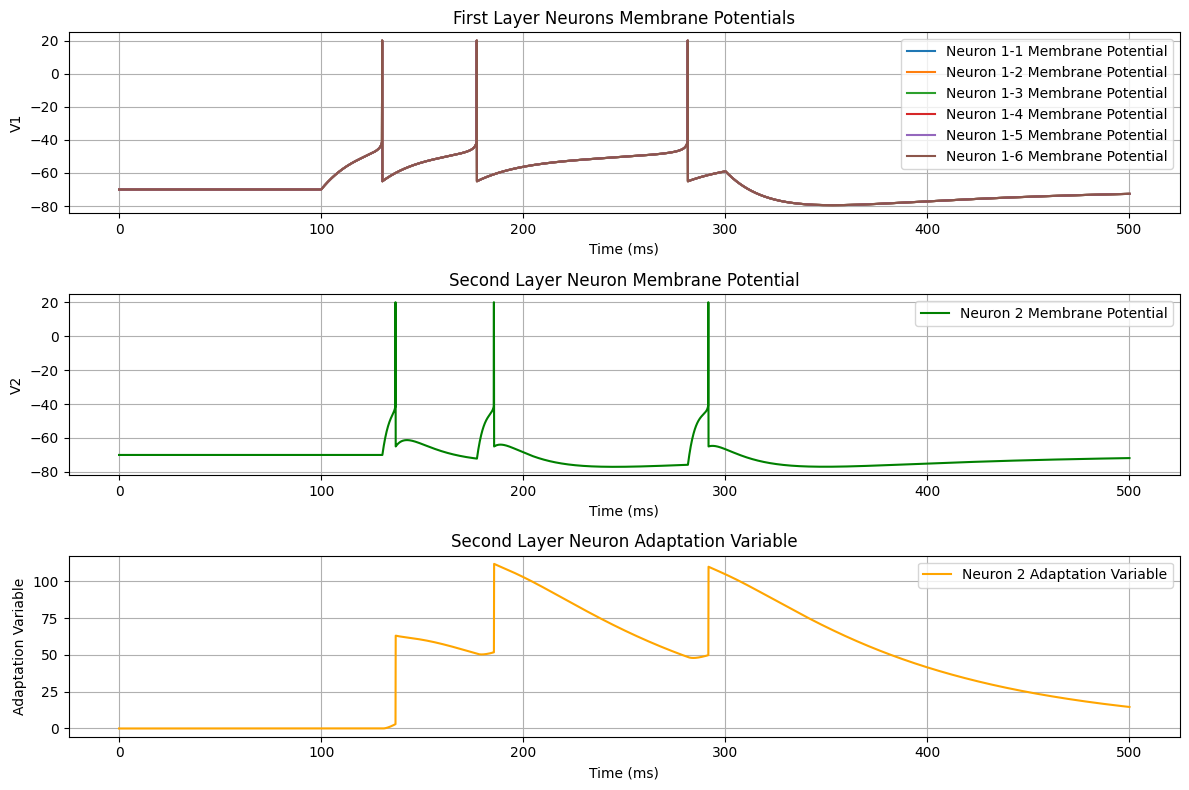

In [3]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
for i in range(n_neurons1):
    plt.plot(time, V1[i, :], label=f"Neuron 1-{i+1} Membrane Potential")
plt.xlabel("Time (ms)")
plt.ylabel("V1")
plt.legend()
plt.title("First Layer Neurons Membrane Potentials")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, V2[0, :], label="Neuron 2 Membrane Potential", color='green')
plt.xlabel("Time (ms)")
plt.ylabel("V2")
plt.title("Second Layer Neuron Membrane Potential")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, w2[0, :], label="Neuron 2 Adaptation Variable", color='orange')
plt.xlabel("Time (ms)")
plt.ylabel("Adaptation Variable")
plt.title("Second Layer Neuron Adaptation Variable")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()